In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('Zomato data.csv')

In [6]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [7]:
print(data)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [11]:
data.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [15]:
def handelRate(value):
  value = str(value).split('/')
  value = value[0]
  return value

data['rate'] = data['rate'].apply(handelRate)
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [17]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [32]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [37]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


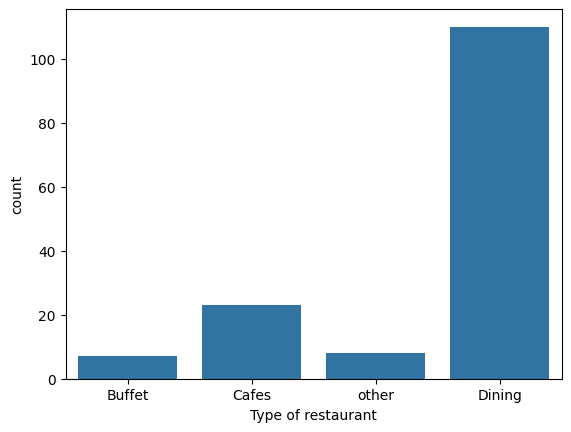

In [39]:
# Q1) Which type of restaurant is used most for odering


type_counts = data['listed_in(type)'].value_counts()
print(type_counts)

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = data['listed_in(type)'])
plt.xlabel("Type of restaurant")


# for heatmap
'''sns.heatmap(data = type_counts.to_frame(), annot=True, fmt='d', cmap='viridis')
plt.xlabel("Type of restaurant") '''
plt.show()

Q1)---> conclusion -majority of the resturant falls in dinning category

Text(0, 0.5, 'Votes')

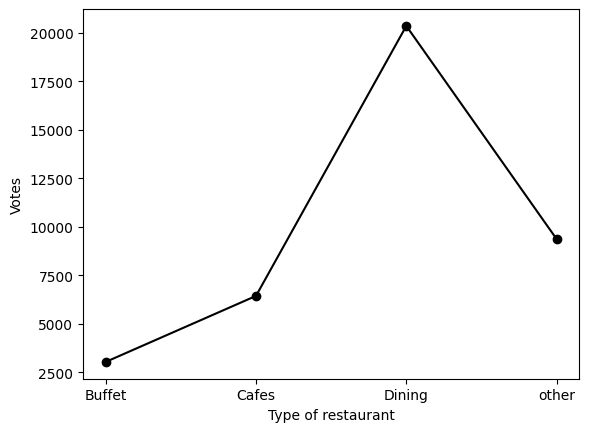

In [52]:
# Q2) How many votes has each type of resturant received from coustomers?

data1 = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':data1}) # Use pd.DataFrame to create a dataframe
plt.plot(result, c="black", marker="o")
plt.xlabel("Type of restaurant")
plt.ylabel("Votes")

Q2)---> Conclusion- dinning restaurant has received maximum votes

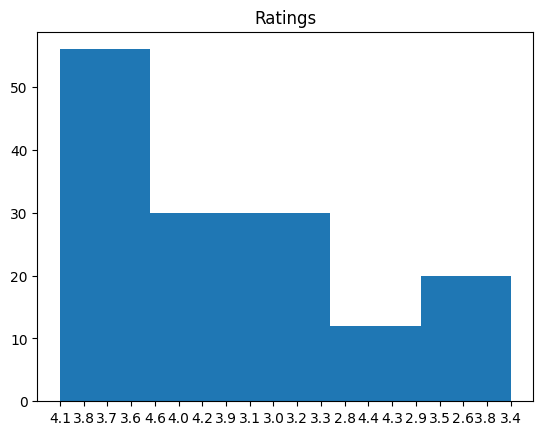

In [64]:
# Q3) What are the ratings that the majority of restaurants have received?

'''plt.plot(data['rate'].value_counts(), c="black", marker="o")
plt.xlabel("Ratings")'''

'''plt.bar(data['rate'].value_counts().index, data['rate'].value_counts().values)
plt.xlabel("Ratings")'''

plt.hist(data['rate'], bins=5)  ##bins is used for gap or distance in line.
plt.title("Ratings")
plt.show()

Q3)---> Conclusion -majority restaurant recevied 3.5 to 4 ratings.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

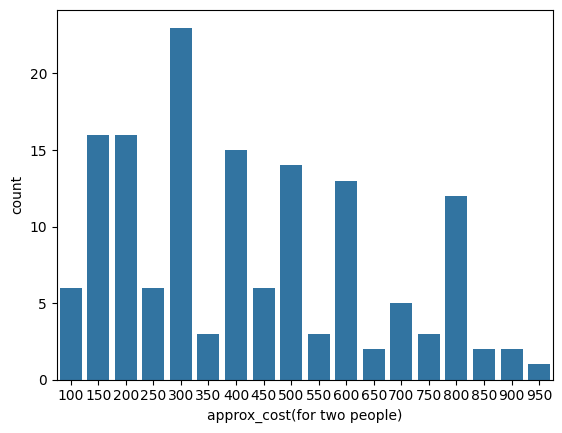

In [70]:
#Q4) Zomato has obserred that most couples order most of their food online. What is their average spending on each order?

data2 = data['approx_cost(for two people)']
sns.countplot(x = data2)


Q4)---> Conculsion -majority of couples preffer resturant with an approximate cost of 300rs

<Axes: xlabel='online_order', ylabel='rate'>

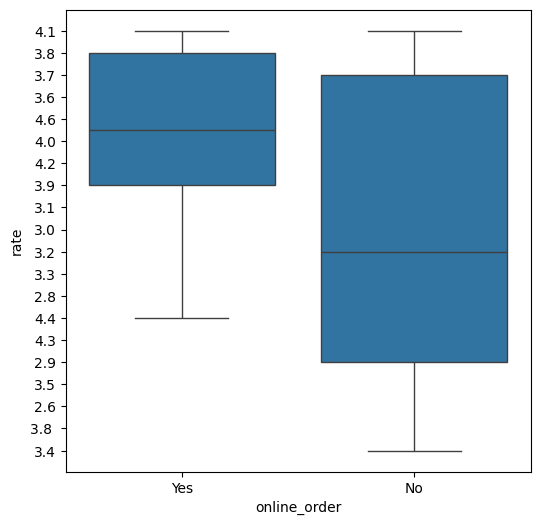

In [79]:
# Q5) which mode(online or offline) has received the maximum rateings?

plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = data)

Q5)---> conculsion -offline order received lower ratings in compare online rateings

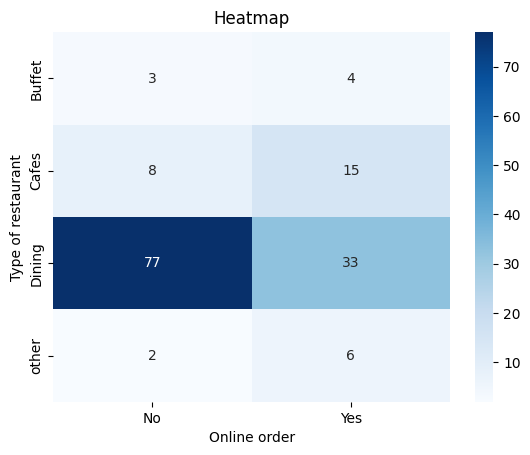

In [83]:
#Q6) Which type of restaurant recived more offline orders, so that zomato can provide coupon to online customers with some good offers

data3 = data.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(data3, annot = True, cmap = 'Blues', fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Type of restaurant")
plt.show()

Q6)---> Conclusion -dinning resturants primarily accepted offline orders, whereas cafes, buffet and other receive online orders. This suggest that clients prefer orders in person at restaurants, but prefer online ordering at cafes.